In [120]:
#패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
path ='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
#한글과 음수표시
matplotlib.rc('font',family=fontprop)
matplotlib.rc('axes',unicode_minus=False)

In [74]:
tag_end = pd.read_csv("/home/piai/바탕화면/B4_제지/01_tags2/tag_end.csv", encoding='euc-kr')
tag_end = tag_end.drop('Unnamed: 0', axis = 1)
tag_end.head()

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,2020-12-31 15:00:00,14.998843,3.627277,3.638380,150.183147,0.0,0.0,0.0,100.0,91.560300,...,40.445474,40.286198,39.838523,40.442122,0.099745,0.232226,0.032899,0.0,81.412858,정상
1,2020-12-31 15:01:00,14.998953,3.629643,3.638348,150.200404,0.0,0.0,0.0,100.0,91.561358,...,39.907138,40.272303,39.846898,40.621681,0.099763,0.232226,0.032911,0.0,81.472849,정상
2,2020-12-31 15:02:00,14.999063,3.632929,3.638315,150.217660,0.0,0.0,0.0,100.0,91.562416,...,39.346890,40.258407,39.855274,40.774376,0.099781,0.232226,0.032922,0.0,81.344790,정상
3,2020-12-31 15:03:00,14.999173,3.607274,3.638283,150.234917,0.0,0.0,0.0,100.0,91.563475,...,38.762017,40.244512,39.863649,40.744808,0.099799,0.232226,0.032934,0.0,81.530460,정상
4,2020-12-31 15:04:00,14.999284,3.651782,3.638250,150.252173,0.0,0.0,0.0,100.0,91.564533,...,39.265926,40.230616,39.872025,40.681057,0.099817,0.232226,0.032946,0.0,81.884934,정상


In [128]:
tag_end['cause'].replace(['DOWN TIME' '계획보수' '공전' '공정청소' '불량중지' '정상' '중지' '지종교체' '한전PEAK절전'],0,inplace=True)

In [75]:
tag_list = pd.read_csv("/home/piai/바탕화면/B4_제지/02_태그리스트.csv",sep=';', encoding='euc-kr')
tag_list.head()

,id,기계정보,공정번호,공정설명,한글 공정설명,태그설명,측정단위,값설명,기준최소값,기준최대값
0,TAG_001,Vacuum,1,Approach,증해 및 표백 파트,1ST NASH P/P CURRENT,Current,Measurement,12.0,18.0
1,TAG_002,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CONS,Consistency,Measurement,3.5,4.2
2,TAG_003,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CIC V/V,Consistency,Output,30.0,50.0
3,TAG_004,Mixing Flow,1,Approach,증해 및 표백 파트,MACHINE CHEST TO STOCK BOX 농도,Consistency,Measurement,3.5,4.2
4,TAG_005,Mixing Flow,1,Approach,증해 및 표백 파트,pm21 PCC FLOW,Flow,Measurement,0.0,320.0


# 공정4 기계별 분류

In [86]:
# tag_end 반영한 tag_list
tag_list = pd.read_csv("/home/piai/바탕화면/B4_제지/02_태그리스트.csv",sep=';', encoding='euc-kr')
tag_list.drop([2,8,9,18,22,24,25,27,28,29,35,36,38,44,50,52,54,58,60,80,81,82,85,90,91,92,94,95,96,97,100,112,115,119,120,121,124,125,130,132,133,150,154,155,156,160,165,172,173,175,177,178,179,193,194,195], axis=0)
tag_list.head()

,id,기계정보,공정번호,공정설명,한글 공정설명,태그설명,측정단위,값설명,기준최소값,기준최대값
0,TAG_001,Vacuum,1,Approach,증해 및 표백 파트,1ST NASH P/P CURRENT,Current,Measurement,12.0,18.0
1,TAG_002,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CONS,Consistency,Measurement,3.5,4.2
2,TAG_003,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CIC V/V,Consistency,Output,30.0,50.0
3,TAG_004,Mixing Flow,1,Approach,증해 및 표백 파트,MACHINE CHEST TO STOCK BOX 농도,Consistency,Measurement,3.5,4.2
4,TAG_005,Mixing Flow,1,Approach,증해 및 표백 파트,pm21 PCC FLOW,Flow,Measurement,0.0,320.0


In [ ]:
tag_list = pd.read_csv("/home/piai/바탕화면/B4_제지/02_태그리스트.csv",sep=';', encoding='euc-kr')
tag_list[(tag_list['id']==4)==True]

In [77]:
tag_4 = tag_list[(tag_list['공정번호']==4)==True]
tag_4.head()

,id,기계정보,공정번호,공정설명,한글 공정설명,태그설명,측정단위,값설명,기준최소값,기준최대값
86,TAG_087,Size Press,4,Dryer & Size,드라이 및 사이즈 프레스 파트,SIZE BOTTOM INLET FLOW,Flow,Measurement,600.0,720.0
87,TAG_088,Size Press,4,Dryer & Size,드라이 및 사이즈 프레스 파트,SIZE TOP INLET FLOW,Flow,Measurement,600.0,720.0
88,TAG_089,Drainage,4,Dryer & Size,드라이 및 사이즈 프레스 파트,MAIN STEAM TOTAL FLOW,Flow,Measurement,10.0,40.0
89,TAG_090,Drainage,4,Dryer & Size,드라이 및 사이즈 프레스 파트,UTILITY STEAM FLOW,Flow,Measurement,1.0,4.0
90,TAG_091,Drainage,4,Dryer & Size,드라이 및 사이즈 프레스 파트,PM21 MAIN STEAM,Flow,Output,0.0,0.0


In [78]:
set(tag_4['기계정보']) # 기계 정보 중복 없이 보기

{'Broke',
 'Calender',
 'Chemical',
 'Condensate',
 'Drainage',
 'Dryer',
 'Head Box',
 'Hood',
 'Press',
 'Pulper',
 'Reel',
 'Size',
 'Size Kitchen',
 'Size Press',
 'Vacuum',
 'W.W Recovery',
 'Water',
 'Wire'}

In [92]:
# 기계별 분류
Broke = tag_4[(tag_4['기계정보']=='Broke')==True]
Calender = tag_4[(tag_4['기계정보']=='Calender')==True]
Chemical = tag_4[(tag_4['기계정보']=='Chemical')==True]
Condensate = tag_4[(tag_4['기계정보']=='Condensate')==True]
Drainage = tag_4[(tag_4['기계정보']=='Drainage')==True]
Dryer = tag_4[(tag_4['기계정보']=='Dryer')==True]
Head_Box = tag_4[(tag_4['기계정보']=='Head Box')==True]
Hood = tag_4[(tag_4['기계정보']=='Hood')==True]
Press = tag_4[(tag_4['기계정보']=='Press')==True]
Pulper = tag_4[(tag_4['기계정보']=='Pulper')==True]
Reel = tag_4[(tag_4['기계정보']=='Reel')==True]
Size = tag_4[(tag_4['기계정보']=='Size')==True]
Size_Kitchen = tag_4[(tag_4['기계정보']=='Size Kitchen')==True]
Size_Press = tag_4[(tag_4['기계정보']=='Size Press')==True]
Vacuum = tag_4[(tag_4['기계정보']=='Vacuum')==True]
WW_Recovery = tag_4[(tag_4['기계정보']=='W.W Recovery')==True]
Water = tag_4[(tag_4['기계정보']=='Water')==True]
Wire = tag_4[(tag_4['기계정보']=='Wire')==True]

In [95]:
Calender

,id,기계정보,공정번호,공정설명,한글 공정설명,태그설명,측정단위,값설명,기준최소값,기준최대값
122,TAG_123,Calender,4,Dryer & Size,드라이 및 사이즈 프레스 파트,CALENDER PIT DILUTION,Control Valve,Output,30.0,50.0
123,TAG_124,Calender,4,Dryer & Size,드라이 및 사이즈 프레스 파트,CALENDER PIT DILUTION,Control Valve,Output,0.0,30.0
129,TAG_130,Calender,4,Dryer & Size,드라이 및 사이즈 프레스 파트,CALENDER PIT LEVEL,Level,Measurement,20.0,60.0
151,TAG_152,Calender,4,Dryer & Size,드라이 및 사이즈 프레스 파트,CALENDER BOT R/L BOT SHOE PRESSURE,Pressure,Measurement,0.0,8.0
152,TAG_153,Calender,4,Dryer & Size,드라이 및 사이즈 프레스 파트,CALENDER 중간 R/L TOP SHOE PRESSURE,Pressure,Measurement,0.0,6.5
153,TAG_154,Calender,4,Dryer & Size,드라이 및 사이즈 프레스 파트,CALENDER 중간 R/L BOT SHOE PRESSURE,Pressure,Measurement,0.0,7.5


In [11]:
tag_end[(tag_end['datetime']=='2021-09-30 15:00:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
388906,2021-09-30 15:00:00,13.879591,3.591563,3.603951,93.104557,0.0,0.006454,0.0,100.0,91.855954,...,39.673929,38.889307,39.910762,42.21846,0.09773,0.322345,0.030284,0.049203,35.902923,정상


In [133]:
process_4 = pd.concat([tag_end['datetime'].iloc[388906:,],tag_end.iloc[388906:,64:140]], axis=1)
process_4.reset_index(inplace=True)
process_4 = process_4.drop('index',axis=1)
process_4

,datetime,TAG_087,TAG_088,TAG_089,TAG_090,TAG_099,TAG_100,TAG_102,TAG_103,TAG_104,...,TAG_184,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193
0,2021-09-30 15:00:00,662.156129,677.164041,28.896510,2.380902,-0.355153,42.391197,55.694858,62.347480,0.580175,...,39.215530,39.673929,38.889307,39.910762,42.218460,0.097730,0.322345,0.030284,0.049203,35.902923
1,2021-09-30 15:01:00,662.884845,678.626221,28.700685,2.373349,-0.355153,42.059729,55.694858,61.050580,0.580148,...,40.399420,39.667297,41.708718,39.912015,40.844201,0.097998,0.322362,0.030274,0.049199,36.066923
2,2021-09-30 15:02:00,659.476299,677.201687,27.778452,2.384326,-0.355153,41.563583,55.694858,63.972588,0.580121,...,41.349246,39.660666,41.785286,39.913267,39.469374,0.098267,0.322379,0.030265,0.049196,36.346381
3,2021-09-30 15:03:00,659.628124,676.600030,27.408192,2.398319,-0.355153,40.881229,55.694858,67.541911,0.580094,...,39.705663,39.654035,40.212262,39.914520,38.190865,0.098535,0.322396,0.030255,0.049193,36.600289
4,2021-09-30 15:04:00,663.839641,684.603089,27.369235,2.408280,-0.355153,40.198704,55.694858,68.261754,0.580067,...,40.363326,39.667617,37.589256,39.915772,37.570650,0.098803,0.322412,0.030245,0.049190,36.679376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132457,2021-12-31 14:55:00,681.221097,700.320434,29.578664,2.562326,-0.355153,52.171682,55.694858,59.150255,0.497018,...,40.474829,40.117508,39.971576,39.364815,39.912516,0.114904,0.189613,0.031485,0.035789,47.532919
132458,2021-12-31 14:56:00,678.979957,702.397174,29.535706,2.562326,-0.355153,55.586403,55.694858,63.239438,0.497030,...,40.423817,40.108738,39.860990,39.372183,39.959582,0.115859,0.189603,0.031483,0.035789,47.532919
132459,2021-12-31 14:57:00,680.214629,701.784950,30.298024,2.562326,-0.355153,59.001125,55.694858,61.210408,0.497042,...,40.372805,40.099968,39.750405,39.379555,40.006648,0.116815,0.189593,0.031481,0.035789,47.532919
132460,2021-12-31 14:58:00,681.451531,701.540532,29.098316,2.562326,-0.355153,60.513144,55.694858,57.663838,0.497055,...,40.321792,40.092740,40.433912,39.386927,40.053714,0.117771,0.189583,0.031479,0.035789,47.532919


In [124]:
Calender['id']

122    TAG_123
123    TAG_124
129    TAG_130
151    TAG_152
152    TAG_153
153    TAG_154
Name: id, dtype: object

Text(0.5, 0.98, 'Correlation Heatmap of Numeric Features')

<Figure size 640x480 with 0 Axes>

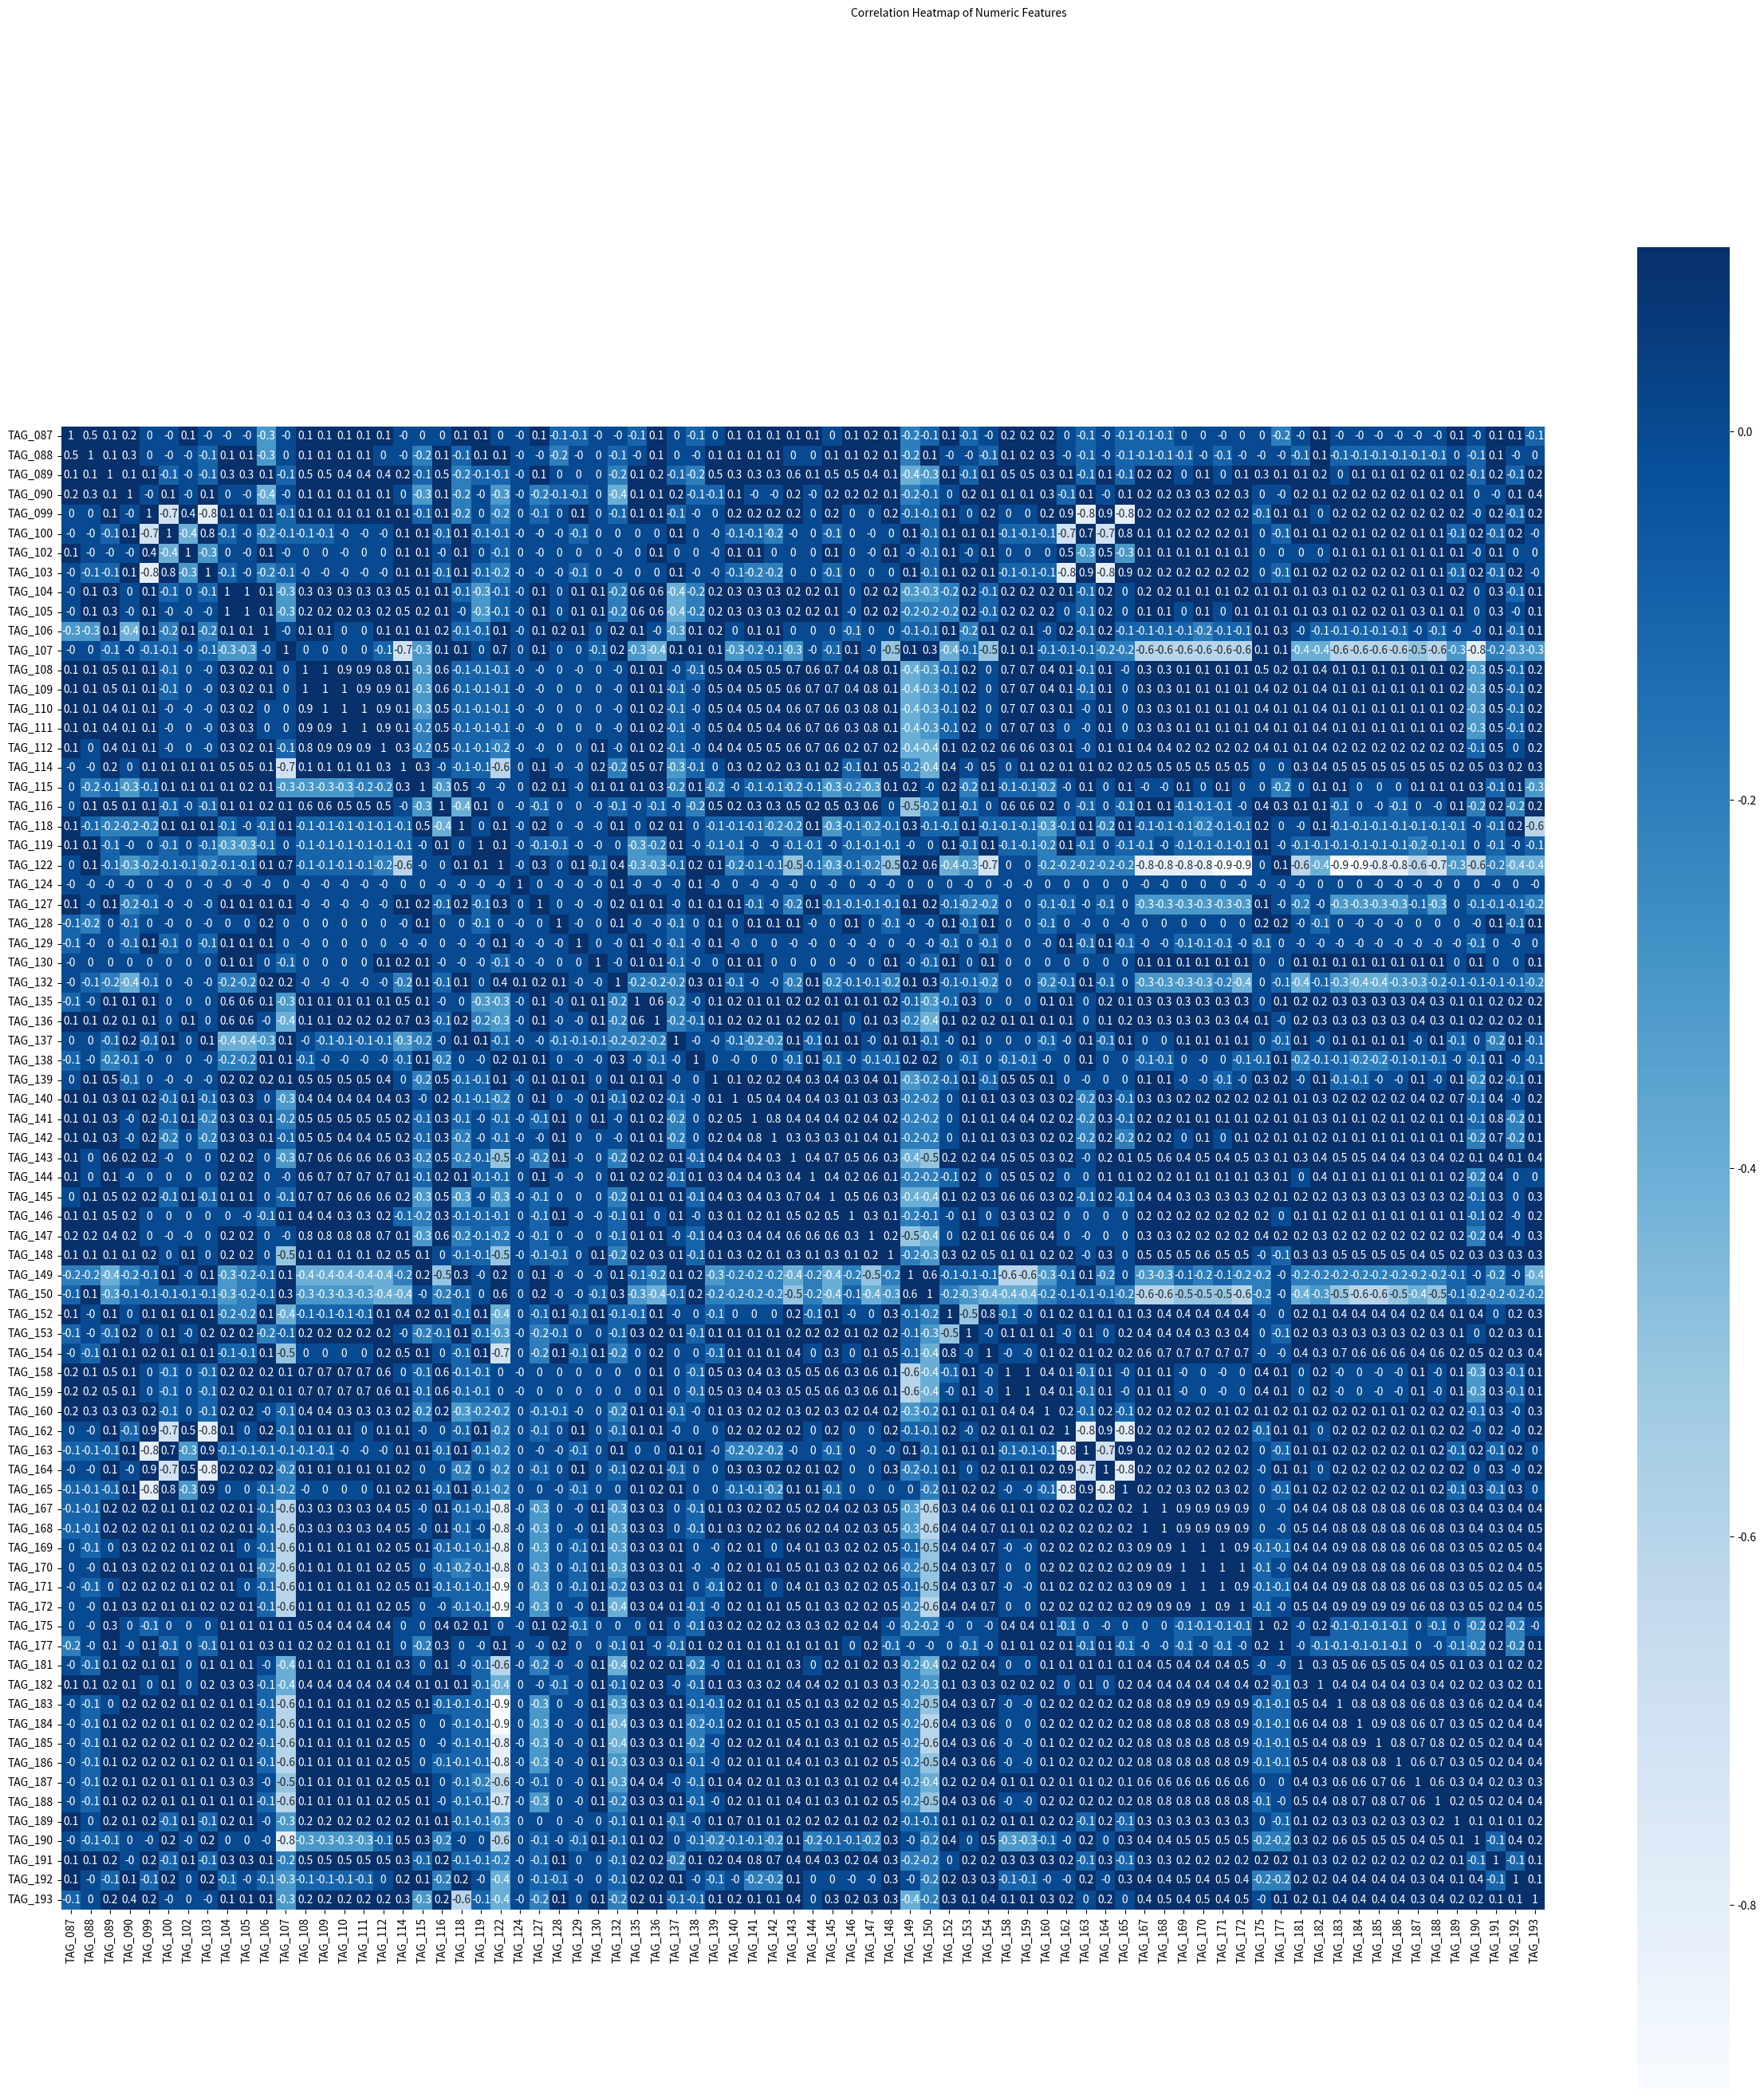

In [145]:
fig = plt.figure()
flg,ax = plt.subplots(figsize=[30, 30])
process_4_co = process_4.corr().round(1)
sns.heatmap(process_4_co, annot=True, square=True, vmax=0.1, cmap='Blues')
plt.suptitle('Correlation Heatmap of Numeric Features', fontsize=10)

In [146]:
process_4_co

,TAG_087,TAG_088,TAG_089,TAG_090,TAG_099,TAG_100,TAG_102,TAG_103,TAG_104,TAG_105,...,TAG_184,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193
TAG_087,1.0,0.5,0.1,0.2,0.0,-0.0,0.1,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.1,-0.0,0.1,0.1,-0.1
TAG_088,0.5,1.0,0.1,0.3,0.0,-0.0,-0.0,-0.1,0.1,0.1,...,-0.1,-0.1,-0.1,-0.1,-0.1,0.0,-0.1,0.1,-0.0,0.0
TAG_089,0.1,0.1,1.0,0.1,0.1,-0.1,-0.0,-0.1,0.3,0.3,...,0.1,0.1,0.1,0.2,0.1,0.2,-0.1,0.2,-0.1,0.2
TAG_090,0.2,0.3,0.1,1.0,-0.0,0.1,-0.0,0.1,0.0,-0.0,...,0.2,0.2,0.2,0.1,0.2,0.1,0.0,-0.0,0.1,0.4
TAG_099,0.0,0.0,0.1,-0.0,1.0,-0.7,0.4,-0.8,0.1,0.1,...,0.2,0.2,0.2,0.2,0.2,0.2,-0.0,0.2,-0.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAG_189,0.1,0.0,0.2,0.1,0.2,-0.1,0.1,-0.1,0.2,0.1,...,0.3,0.2,0.3,0.3,0.2,1.0,0.1,0.1,0.1,0.2
TAG_190,-0.0,-0.1,-0.1,0.0,-0.0,0.2,-0.0,0.2,0.0,0.0,...,0.5,0.5,0.5,0.4,0.5,0.1,1.0,-0.1,0.4,0.2
TAG_191,0.1,0.1,0.2,-0.0,0.2,-0.1,0.1,-0.1,0.3,0.3,...,0.2,0.2,0.2,0.2,0.2,0.1,-0.1,1.0,-0.1,0.1
TAG_192,0.1,-0.0,-0.1,0.1,-0.1,0.2,0.0,0.2,-0.1,-0.0,...,0.4,0.4,0.4,0.3,0.4,0.1,0.4,-0.1,1.0,0.1


In [154]:
process_4_co['TAG_087']

TAG_087    1.0
TAG_088    0.5
TAG_089    0.1
TAG_090    0.2
TAG_099    0.0
          ... 
TAG_189    0.1
TAG_190   -0.0
TAG_191    0.1
TAG_192    0.1
TAG_193   -0.1
Name: TAG_087, Length: 76, dtype: float64

In [121]:
def correlation(corr, pval):
    corr, pval = stats.pearsonr(corr, pval)
    
    print("Correlation Analysis")
    print("corr:{0:0.3f}".format(corr))
    print("p-value:{0:0.3f}".format(pval))

In [123]:
correlation(process_4['TAG_099'], process_4["TAG_100"])

Correlation Analysis
corr:-0.709
p-value:0.000


In [122]:
correlation(process_4['TAG_104'], process_4["TAG_105"])

Correlation Analysis
corr:0.982
p-value:0.000
